# Homework 5
# OCNG 489
## Author: Trent Spencer
### Python 3.5.1

In [69]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
import shapely.ops
import pandas as pd
%matplotlib inline
from scipy import spatial
from scipy import interpolate

On this flight, you see the following states: ['Arizona' 'California' 'Colorado' 'Connecticut' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico'
 'New York' 'Ohio' 'Pennsylvania' 'Utah' 'West Virginia']


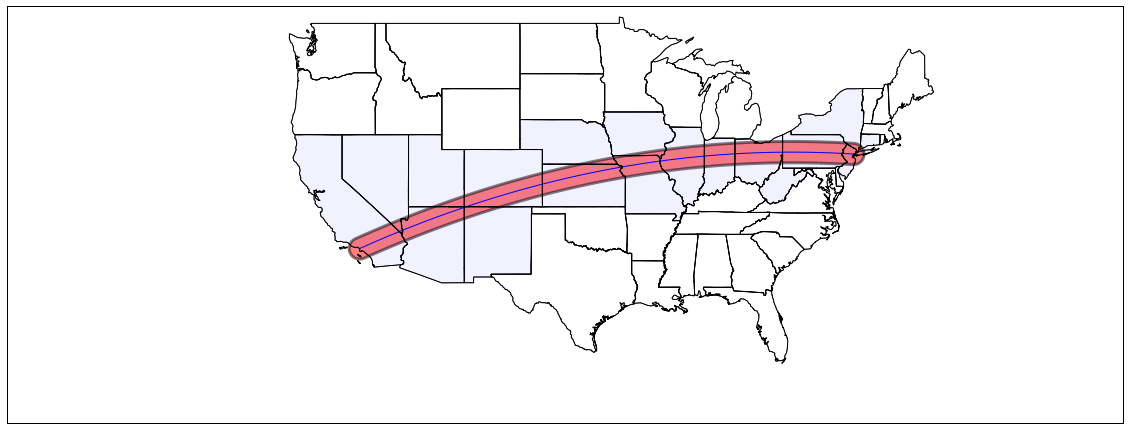

In [63]:
# Question 1
fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('../python4geosciences/materials/states_21basic/states', 'states')
stlst = []
statesyousee = []
sysnames = []
for st in m.states:
    stlst.append(shapely.geometry.Polygon(st))
lat1 = 33.9425
lon1 = -118.4081
lat2 = 40.6925
lon2 = -74.1686
px, py = m.gcpoints(lon1, lat1, lon2, lat2, 1000)
m.plot(px,py)
line = shapely.geometry.LineString(zip(px,py))
line = line.buffer(100000)
ax1.fill(line.boundary.xy[0],line.boundary.xy[1],'r',lw=3,alpha=0.5)
for num, s in enumerate(stlst):
    if s.intersects(line):
        color = 'b'
        statesyousee.append(s)
        sysnames.append(m.states_info[num]['STATE_NAME'])
    else:
         color = 'w'
    ax1.plot(*s.boundary.xy, color='k')
    ax1.fill(*s.boundary.xy, color=color, alpha = 0.05)
print('On this flight, you see the following states:', np.unique(sysnames))

[3, 0, -1, 2]
[4, 1, 0, 3]
[-1, 5, 6, 7]
[-1, 0, 1, 5]
[]
[12, 10, 8, 9, 11]
[9, 2, 3, 4, 8]
[10, 6, 5, 1, 4, 8]
[11, -1, 2, 9]
[12, 7, 6, 10]
[12, 7, -1, 11]


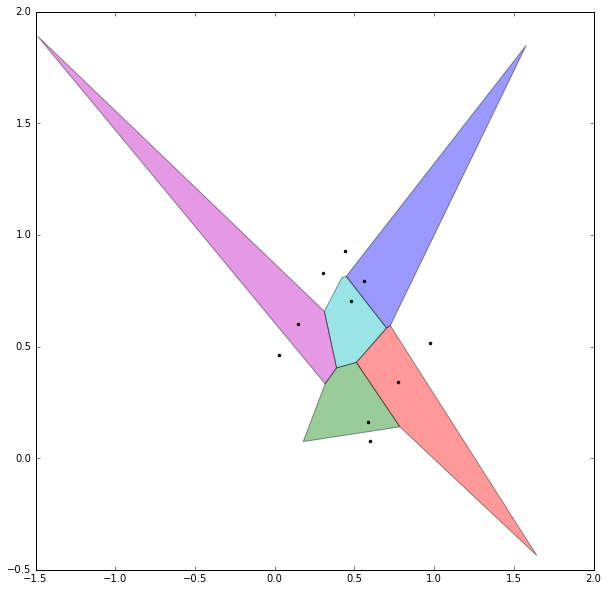

In [39]:
# Question 2
pts = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])
pv = spatial.Voronoi(pts)
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)
for x in pv.regions:
    if not x: continue
    if -1 in x: continue 
    ax1.fill(pv.vertices[x, 0], pv.vertices[x, 1], alpha=0.4)
ax2.plot(pts[:,0],pts[:,1], '.k')

for verts in pv.regions:
    

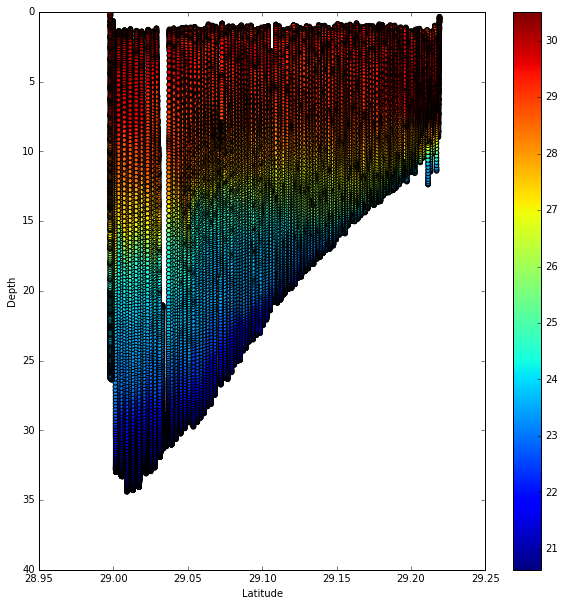

In [101]:
# Question 3, Part 1
data = pd.read_table('../python4geosciences/data/MS03_L15.txt', skiprows = range(114), delim_whitespace=True, usecols = [0,2,3], names = ['Lat','Depth','Temp'])
lat = data['Lat']
depth = data['Depth']
temp = data['Temp']
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111)
sc = ax3.scatter(lat,depth, c = temp)
ax3.set_ylim(40,0)
ax3.set_ylabel('Depth')
ax3.set_xlabel('Latitude')
fig3.colorbar(sc)

In [109]:
# Question 3, Part 1
data = pd.read_table('../python4geosciences/data/MS03_L15.txt', skiprows = range(114), delim_whitespace=True, usecols = [0,2,3], names = ['Lat','Depth','Temp'])
lat = data['Lat']
depth = data['Depth']
temp = data['Temp']


# fig4 = plt.figure(figsize = (10,10))
# ax4 = fig4.add_subplot(111)
# ax4.contourf(lat, depth, zgrid)
# ax4.set_ylim(40,0)
# ax4.set_ylabel('Depth')
# ax4.set_xlabel('Latitude')